# Multiple Instance Learning
### HW-4

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.cluster import contingency_matrix

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
!pip install pyclustering

     |████████████████████████████████| 2.6 MB 5.2 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=c048a6865d0bd6446d15406d631c44d00a187f91cf84ba90f17c9f3ebede4e8f
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [4]:
column_names = ["Bag class", "Bag Id"] + [f"Feature{i}" for i in range(1,167,1)]
data = pd.DataFrame(pd.read_csv("Musk1.csv",header=None, names= column_names))
data.head()

,Bag class,Bag Id,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,...,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166
0,1,1,42,-198,-109,-75,-117,11,23,-88,-28,-27,-232,-212,-66,-286,-287,-300,-57,-75,-192,-184,-66,-18,-50,111,110,18,-18,-127,25,63,-117,-114,-47,9,-135,26,-175,73,...,35,51,11,-187,13,-138,-67,-163,-201,-19,45,-115,-11,-37,-100,77,78,60,-178,-102,-118,-33,-104,41,-77,-120,-111,-168,-54,-195,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,-45,5,-325,-115,-107,-281,-257,-303,54,-154,-101,-47,-31,-28,1,191,72,-38,50,-64,-63,98,-117,-113,-46,2,-135,25,-159,1,...,-26,75,-107,-187,13,-138,-77,-129,-224,-89,51,-70,-19,-35,-29,3,43,10,-178,-102,-119,-57,-70,53,-77,-123,-111,-168,-54,-195,-238,-302,60,-120,-39,31,48,-37,5,30
2,1,1,42,-191,-142,-75,-117,11,49,-161,-45,-28,-278,-115,-67,-274,-285,-303,53,-154,-100,-183,-31,-28,1,110,110,-38,51,-64,25,63,-117,-113,-47,10,-135,26,-175,2,...,35,51,11,-187,13,-138,-77,-129,-221,-89,52,-71,-19,-35,-29,3,43,10,-178,-102,-118,-57,-70,54,-77,-120,-111,-168,-54,-195,-238,-73,-127,-120,-38,30,48,-37,5,31
3,1,1,42,-198,-110,-65,-117,55,23,-95,-28,5,-301,-212,-107,-280,-284,-301,-56,-74,-192,-46,-66,-19,-50,191,73,18,-19,-128,-63,98,-117,-113,-46,3,-135,25,-159,73,...,-27,76,-108,-187,13,-138,-67,-163,-201,-19,45,-115,-10,-37,-100,76,78,59,-178,-102,-118,-33,-104,41,-77,-123,-111,-168,-54,-195,-238,-302,60,-120,-39,30,48,-37,6,30
4,1,2,42,-198,-102,-75,-117,10,24,-87,-28,-28,-233,-212,-67,-286,-286,-299,-57,-74,-191,-182,-66,-18,-50,109,111,18,-18,-128,25,63,-117,55,-28,10,-131,66,-175,73,...,36,51,12,-187,17,-138,-67,-163,-201,-20,45,-116,-10,-37,-99,76,79,60,-177,-102,-118,-33,-104,41,-66,-120,-111,-120,97,-121,-238,-73,-127,51,128,144,43,-30,14,26


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Columns: 168 entries, Bag class to Feature166
dtypes: int64(168)
memory usage: 624.9 KB
None


In [6]:
#check any empty cell
data.isna().any()

Bag class     False
Bag Id        False
Feature1      False
Feature2      False
Feature3      False
              ...  
Feature162    False
Feature163    False
Feature164    False
Feature165    False
Feature166    False
Length: 168, dtype: bool

166 Features  
There is no empty column  
All features are numeric  
First Column 0 : the Bag Class  
Second Column 1 : the Bag ID  
From column3 - column168 All Features Numerical   
Bag Classes: 0(negative), 1(positive)

In [7]:
#47 are judged by human experts to be musks and the remaining 45 molecules are judged to be non-musks.
data.groupby("Bag Id")["Bag class"].mean().value_counts()

1    47
0    45
Name: Bag class, dtype: int64

In [10]:
# define min max scaler
data_scaled = data.copy()
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data.iloc[: , 2:])
scaled = pd.DataFrame(scaled)
scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165
0,0.366906,0.003367,0.228916,0.147059,0.0,0.507812,0.502604,0.341289,0.567639,0.511952,0.220418,0.218391,0.563246,0.147619,0.013550,0.054381,0.480000,0.525499,0.196040,0.114341,0.469636,0.505988,0.463801,0.473822,0.595506,0.644444,0.516575,0.118971,0.514019,0.526699,0.003247,0.119863,0.224490,0.650794,0.054830,0.036364,0.0000,0.742297,0.008,0.681081,...,0.784314,0.590810,0.681034,0.002941,0.457265,0.006452,0.512048,0.337121,0.311258,0.532934,0.635659,0.259939,0.611979,0.505071,0.364662,0.724518,0.636119,0.703927,0.002801,0.014409,0.101562,0.501493,0.330357,0.635616,0.132791,0.017921,0.003135,0.011765,0.297386,0.006452,0.035623,0.631313,0.225641,0.046875,0.232190,0.292683,0.048689,0.608974,0.776471,0.332248
1,0.366906,0.026936,0.096386,0.183824,0.0,0.622396,0.570312,0.145585,0.522546,0.575697,0.004640,0.404215,0.465394,0.159524,0.094851,0.045317,0.797143,0.350333,0.376238,0.379845,0.540486,0.476048,0.579186,0.683246,0.488764,0.506173,0.704420,0.321543,0.239875,0.611650,0.003247,0.123288,0.227405,0.634921,0.054830,0.032727,0.0401,0.540616,0.008,0.591892,...,0.634804,0.643326,0.426724,0.002941,0.457265,0.006452,0.491968,0.401515,0.260486,0.323353,0.651163,0.397554,0.591146,0.509128,0.498120,0.520661,0.541779,0.552870,0.002801,0.014409,0.093750,0.429851,0.431548,0.668493,0.132791,0.007168,0.003135,0.011765,0.297386,0.006452,0.035623,0.055556,0.710256,0.046875,0.229551,0.295393,0.048689,0.608974,0.773529,0.332248
2,0.366906,0.026936,0.096386,0.147059,0.0,0.507812,0.570312,0.167064,0.522546,0.509960,0.113689,0.404215,0.560859,0.176190,0.018970,0.045317,0.794286,0.350333,0.378218,0.116279,0.540486,0.476048,0.579186,0.471204,0.595506,0.506173,0.707182,0.321543,0.514019,0.526699,0.003247,0.123288,0.224490,0.653061,0.054830,0.036364,0.0000,0.543417,0.008,0.591892,...,0.784314,0.590810,0.681034,0.002941,0.457265,0.006452,0.491968,0.401515,0.267108,0.323353,0.653747,0.394495,0.591146,0.509128,0.498120,0.520661,0.541779,0.552870,0.002801,0.014409,0.101562,0.429851,0.431548,0.671233,0.132791,0.017921,0.003135,0.011765,0.297386,0.006452,0.035623,0.633838,0.230769,0.046875,0.232190,0.292683,0.048689,0.608974,0.773529,0.335505
3,0.366906,0.003367,0.224900,0.183824,0.0,0.622396,0.502604,0.324582,0.567639,0.575697,0.060325,0.218391,0.465394,0.161905,0.021680,0.051360,0.482857,0.527716,0.196040,0.381783,0.469636,0.502994,0.463801,0.683246,0.491573,0.644444,0.513812,0.115756,0.239875,0.611650,0.003247,0.123288,0.227405,0.637188,0.054830,0.032727,0.0401,0.742297,0.008,0.678378,...,0.632353,0.645514,0.424569,0.002941,0.457265,0.006452,0.512048,0.337121,0.311258,0.532934,0.635659,0.259939,0.614583,0.505071,0.364662,0.721763,0.636119,0.700906,0.002801,0.014409,0.101562,0.501493,0.330357,0.635616,0.132791,0.007168,0.003135,0.011765,0.297386,0.006452,0.035623,0.055556,0.710256,0.046875,0.229551,0.292683,0.048689,0.608974,0.776471,0.332248
4,0.366906,0.003367,0.257028,0.147059,0.0,0.505208,0.505208,0.343675,0.567639,0.509960,0.218097,0.218391,0.560859,0.147619,0.016260,0.057402,0.480000,0.527716,0.198020,0.118217,0.469636,0.505988,0.463801,0.468586,0.598315,0.644444,0.516575,0.115756,0.514019,0.526699,0.003247,0.698630,0.279883,0.653061,0.065274,0.181818,0.0000,0.742297,0.068,0.681081,...,0.786765,0.590810,0.683190,0.002941,0.474359,0.006452,0.512048,0.337121,0.311258,0.529940,0.635659,0.256881,0.614583,0.505071,0.366541,0.721763,0.638814,0.703927,0.005602,0.014409,0.101562,0.501493,0.330357,0.635616,0.162602,0.017921,0.003135,0.200000,0.790850,0.245161,0.035623,0.633838,0.230769,0.581250,0.670185,0.601626,0.029963,0.653846,0.800000,0.319218


In [11]:
#concat scaled data and bag informations
frames = [data.iloc[:, 0:2], scaled]
  
transform_result = pd.concat(frames, axis=1)

In [12]:
transform_result = transform_result.copy()
transform_data = pd.DataFrame(transform_result.groupby('Bag Id').apply(np.mean))
transform_data

,Bag class,Bag Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165
Bag Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,0.366906,0.015152,0.161647,0.165441,0.000000,0.565104,0.536458,0.244630,0.545093,0.543327,0.099768,0.311303,0.513723,0.161310,0.037263,0.049094,0.638571,0.438470,0.286634,0.248062,0.505061,0.490269,0.521493,0.577880,0.542837,0.575309,0.610497,0.219453,0.376947,0.569175,0.003247,0.122432,0.225948,0.643991,0.054830,0.034545,0.020050,0.642157,...,0.708946,0.617615,0.553341,0.002941,0.457265,0.006452,0.502008,0.369318,0.287528,0.428144,0.644057,0.327982,0.602214,0.507099,0.431391,0.621901,0.588949,0.627644,0.002801,0.014409,0.099609,0.465672,0.380952,0.652740,0.132791,0.012545,0.003135,0.011765,0.297386,0.006452,0.035623,0.344066,0.469231,0.046875,0.230871,0.293360,0.048689,0.608974,0.775000,0.333062
2,1.0,2.0,0.366906,0.015152,0.176707,0.165441,0.000000,0.565104,0.537109,0.245823,0.544430,0.543327,0.101508,0.312261,0.513723,0.161905,0.038618,0.052115,0.639286,0.440133,0.288119,0.249031,0.505567,0.491018,0.520928,0.573953,0.544242,0.575309,0.609116,0.217846,0.376168,0.569175,0.003247,0.705479,0.278426,0.645692,0.064621,0.179091,0.020050,0.640756,...,0.712010,0.618709,0.556034,0.002941,0.471154,0.006452,0.503012,0.370265,0.289735,0.425150,0.643411,0.329511,0.601562,0.507606,0.433271,0.620523,0.588949,0.628399,0.005602,0.014409,0.095703,0.462687,0.379464,0.650685,0.161247,0.010753,0.003135,0.207843,0.793301,0.306452,0.035623,0.347854,0.473077,0.581250,0.666227,0.600271,0.029026,0.652244,0.800000,0.320847
3,1.0,3.0,0.366906,0.111111,0.255020,0.310662,0.001408,0.492188,0.514323,0.211217,0.542440,0.430279,0.053364,0.279693,0.344869,0.114286,0.029810,0.057402,0.762857,0.310421,0.298020,0.132752,0.443320,0.479042,0.554299,0.361257,0.501404,0.569136,0.680939,0.178457,0.518692,0.561893,0.003247,0.503425,0.309038,0.697279,0.124021,0.289091,0.011278,0.616246,...,0.742647,0.634573,0.631466,0.220588,0.294872,0.038710,0.398594,0.274621,0.203091,0.428144,0.593023,0.478593,0.625000,0.514199,0.454887,0.610193,0.498652,0.510574,0.005602,0.017291,0.082031,0.492537,0.497024,0.635616,0.172087,0.168459,0.136364,0.437255,0.643791,0.524194,0.041985,0.672980,0.439744,0.462500,0.650396,0.573171,0.076779,0.637821,0.764706,0.288274
4,1.0,4.0,0.371703,0.149270,0.356091,0.267157,0.000000,0.537326,0.499132,0.236277,0.579134,0.486056,0.085847,0.197957,0.391408,0.118254,0.027100,0.054381,0.595238,0.424982,0.183498,0.205426,0.434548,0.488024,0.476621,0.461606,0.500936,0.633745,0.563536,0.166131,0.426791,0.576861,0.003247,0.155251,0.264334,0.670446,0.114012,0.043636,0.022556,0.708683,...,0.708333,0.633844,0.564655,0.150000,0.465812,0.015054,0.441098,0.268939,0.237675,0.534930,0.563307,0.457696,0.589410,0.444219,0.357143,0.699725,0.513926,0.541793,0.005602,0.016330,0.091146,0.530348,0.470238,0.590868,0.169828,0.114695,0.090909,0.273203,0.315904,0.236559,0.037320,0.459596,0.517949,0.170833,0.243624,0.296296,0.057428,0.600427,0.774510,0.339848
5,1.0,5.0,0.507194,0.425926,0.257028,0.329963,0.233803,0.528646,0.518229,0.208831,0.541777,0.481076,0.056845,0.275383,0.442124,0.113690,0.026423,0.053625,0.757143,0.320399,0.293069,0.103198,0.443826,0.479790,0.552602,0.479712,0.501404,0.572840,0.683702,0.200965,0.514019,0.547330,0.285714,0.551370,0.236152,0.660431,0.161880,0.404545,0.007519,0.621148,...,0.766544,0.611597,0.648168,0.230882,0.349359,0.212097,0.404116,0.275095,0.203642,0.432635,0.596899,0.505352,0.623698,0.511156,0.451128,0.603994,0.493261,0.509063,0.254202,0.049712,0.093750,0.490299,0.508929,0.636301,0.153117,0.176523,0.124608,0.450980,0.622549,0.508871,0.036260,0.522096,0.401282,0.437500,0.532322,0.581978,0.125468,0.674679,0.758088,0.354235
...,...,...,...,...,...,...,...,...,...,...,..

In [13]:
# Seperate feature and class matrix
X = transform_data.iloc[:, 2: ].values# feature matrix
y = transform_data.iloc[:, 0].values # class matrix

# K-MEANS METHOD

# Determination of the optimum number of clusters

In [ ]:
!pip install yellowbrick

In [15]:
from yellowbrick.cluster import KElbowVisualizer

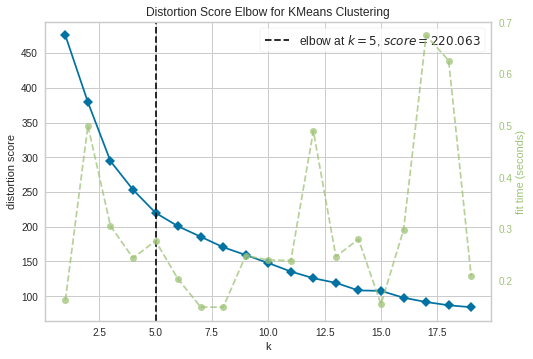

In [16]:
#instead of manuel analyze we can see optimum k numbers with this way
model = KMeans()
visu = KElbowVisualizer(model, k = (1, 20))
visu.fit(X)
visu.show() # Finalize and render the figure
plt.show()

from figure it can be seen that the optimal number of clusters is 5

In [17]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=5, random_state=10)
# call fit method with data 
km = km_model.fit_predict(X)
# coordinates of cluster center
centroids = km_model.cluster_centers_ 
# cluster label for each data point
labels = km_model.labels_ 
km

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 4,
       2, 2, 3, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 3, 0, 0, 0, 2,
       3, 3, 3, 0], dtype=int32)

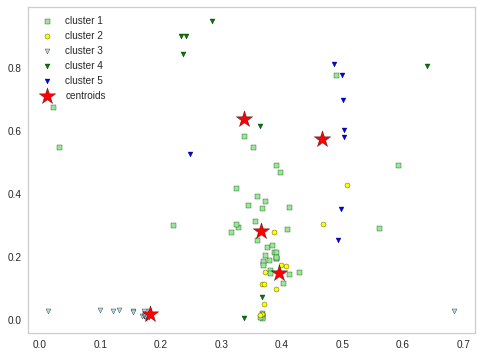

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[km == 3, 0], X[km == 3, 1],
    s=25, c='green',
    marker='v', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    X[km == 4, 0], X[km == 4, 1],
    s=25, c='blue',
    marker='v', edgecolor='black',
    label='cluster 5'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [19]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, km)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 64.13%


In [20]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 5, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 59.78%
The purity score for squared euclidean distance is 59.78%
The purity score for manhattan distance is 58.7%
The purity score for chebyshev distance is 59.78%
The purity score for canberra distance is 58.7%
The purity score for chi-square distance is 56.52%


With using KMeans method, we couldt get a

# K-MEDOIDS

In [21]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 8.1 MB/s 


In [22]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
from pyclustering.utils.metric import distance_metric, type_metric

In [23]:
metric = distance_metric(type_metric.MANHATTAN, degree=2)
kMedoids = KMedoids(n_clusters = 4, random_state = 0, metric = metric)
kMedoids.fit(X)
y_kmed = kMedoids.fit_predict(X)

In [24]:
y_kmed

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1,
       1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 3, 0, 1,
       2, 2, 3, 0])

In [25]:
silhouette_avg = silhouette_score(X, y_kmed)
print(silhouette_avg)

0.27425335664560424


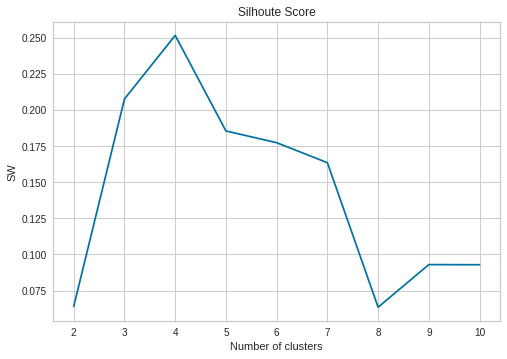

In [26]:
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(X)
    y_kmed = kMedoids.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_kmed)
    sw.append(silhouette_avg)

plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()
    

In [27]:
purity = purity_score(y, y_kmed)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  0.6521739130434783


# RANDOM FOREST CLASSIFIER

In [37]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7857142857142857


In [ ]:
#Model Tuning for RandomForestClassifier
rf_params = {'n_estimators': [100,200,500,1000],
             'max_features': [3,5,7,8],
             'min_samples_split': [2,5,10,20] }
rf_cv_model = GridSearchCV(clf, rf_params, cv=10, n_jobs= -1, verbose = 2).fit(X_train, y_train)

In [ ]:
rf_cv_model.best_params_

In [44]:
rf_tuned = RandomForestClassifier(max_features = 5, min_samples_split = 10, n_estimators = 500).fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

we get a better accuracy result after tuning operation

#LOGISTIC REGRESSION

In [46]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [47]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.])

In [48]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7857


In [49]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.])

In [50]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8750


In [51]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8750
Test set score: 0.7857


In [52]:
#Run Logistic Regression With A L1 Penalty With Various Regularization Strengths
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Training accuracy: 0.96875
Test accuracy: 0.8214285714285714

C: 1
Training accuracy: 0.890625
Test accuracy: 0.75

C: 0.1
Training accuracy: 0.453125
Test accuracy: 0.5714285714285714

C: 0.001
Training accuracy: 0.453125
Test accuracy: 0.5714285714285714



## CONCLUSION

#### RandomForest gave the best result among the applied classification methods after tuning operations.
#### K-means, which is one of the unsupervised learning methods that is suitable for big data, could not give a good success rate when clustering observations according to their similarities to each other. We can prefer   k-medoid which is more robust to noise and outliers as compared to k-means because it minimizes a sum of pairwise dissimilarities instead of a sum of squared Euclidean distances. After apply k-medoids our purity ratio is still lower than the random forest classifier
#### For the Lojistic Regression, the training-set accuracy score is 0.8750 while the test-set accuracy to be 0.7857. So, there is a question of overfitting. So we apply L1 penalty and see the effects of different C parameter on the train and test data accuracy


## References
#### https://chrisalbon.com/code/machine_learning/logistic_regressionlogistic_regression_with_l1_regularization/
#### https://www.kaggle.com/arushchillar/kmeans-clustering-using-different-distance-metrics
#### https://www.kaggle.com/prashant111/logistic-regression-classifier-tutorial